<a href="https://colab.research.google.com/github/yajima-yasutoshi/DataMinig/blob/main/20231025/%E5%8F%AF%E8%A6%96%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データマイニング第5回（2023/10/25）

# 本日の講義の資料

以下のサイトに保存してある。

https://github.com/yajima-yasutoshi/DataMinig/tree/main/20231025

#準備
データ分析に必要なPythonライブラリー（モジュール）のインストールと読み込みを施します。


*   numpy：数値計算
*   pandas：主にデータ加工
*   matplotlib：グラフを作成
*   japanize_matplotlib：日本語を表示
*   seaborn：グラフ作成



In [ ]:
# インストール
!pip install japanize-matplotlib

In [ ]:
# モジュールの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

# データをファイルから読み込む

エクセルファイルをPython環境に読み込むためにPandasの
read_excel()というメソッドを使う


In [ ]:
# 読み込むファイルを指定する
file_path = '/content/drive/MyDrive/周南公立大学/講義/データマイニング/データ/customer_data.xlsx'

# data という変数に読み込む
df = pd.read_excel(file_path)

In [ ]:
df.info()

In [ ]:
# 欠損値のあるレコードを削除
df.dropna(inplace=True)

# 外れ値の削除
indices_to_drop = df[(df['年齢'] >= 90)].index

# 指定したインデックスのレコードを削除
df.drop(indices_to_drop, inplace=True)

df.info()

# 件数
countplot

In [ ]:
# 職業のデータを取得
sns.countplot(x='職業', data=df)
plt.title('職業別の人数')
plt.xlabel('職業')
plt.ylabel('人数')
plt.show()

In [ ]:
# 職業のデータを取得
sns.countplot(y='職業', data=df)
plt.title('職業別の人数')
plt.ylabel('職業')
plt.xlabel('人数')
plt.show()

In [ ]:
# 職業のデータを取得
sns.countplot(x='職業', hue='性別', data=df)
plt.title('職業別の人数')
plt.xlabel('職業')
plt.ylabel('人数')
plt.show()

In [ ]:
# 職業のデータを取得
# 色を指定
sns.countplot(x='職業', hue='性別', data=df, palette={'男性': 'blue', '女性': 'red'})
plt.title('職業別の人数')
plt.xlabel('職業')
plt.ylabel('人数')
plt.show()

## 代表的な色
* blue
* green
* red
* cyan
* magenta
* yellow
* black
* white

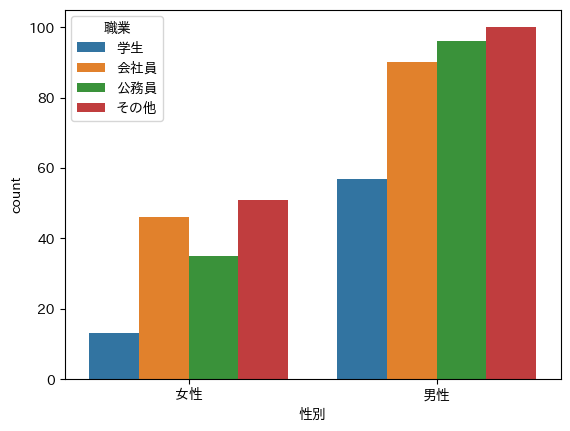

In [ ]:
# 表示順の変更
sns.countplot(data=df, x='性別', order=['女性', '男性'], hue='職業', hue_order=['学生', '会社員', '公務員', 'その他'])
plt.show()

# 棒グラフ
barplot

In [ ]:
# 棒グラフを描画
sns.barplot(x='性別', y='Aの利用回数', data=df, estimator=np.mean)
plt.title('Aの平均利用回数')
plt.xlabel('性別')
plt.ylabel('回数')
plt.show()

estimator=np.mean
の部分は省略が可能。

集計関数 | 意味
-- | --
np.mean | 平均
np.median | 中央値
np.sum  | 合計


In [ ]:
# 棒グラフを描画
sns.barplot(x='性別', y='年収', data=df)
plt.title('男女別の平均年収')
plt.xlabel('性別')
plt.ylabel('金額（万円）')
plt.show()

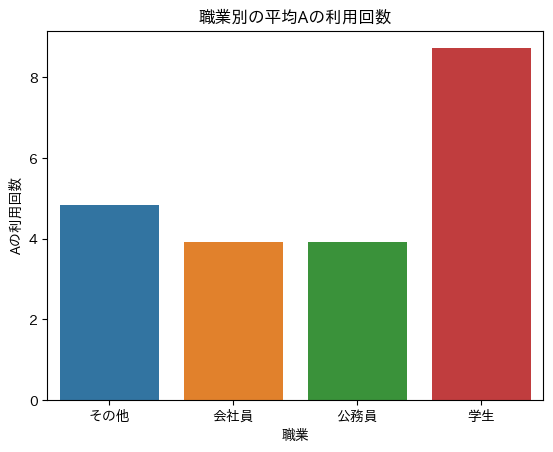

In [ ]:
# selected_df = df[['職業', 'Aの利用回数', 'Bの利用回数']]
# selected_df.groupby(['職業']).mean()

grouped = df[['職業', 'Aの利用回数', 'Bの利用回数']].groupby(['職業']).mean().reset_index()
sns.barplot(x='職業', y='Aの利用回数', data = grouped)
plt.title('職業別の平均Aの利用回数')
plt.xlabel('職業')
plt.ylabel('Aの利用回数')
plt.show()

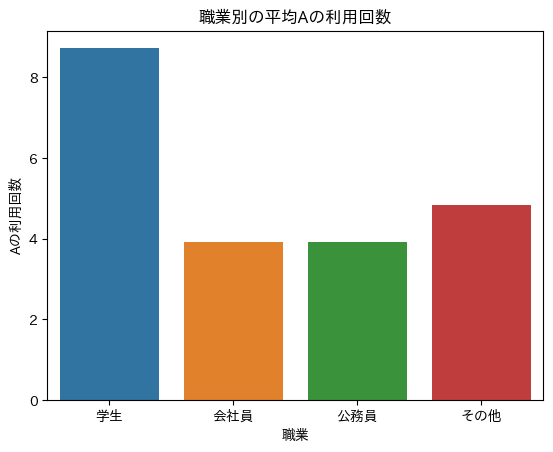

In [ ]:
grouped = df[['職業', 'Aの利用回数', 'Bの利用回数']].groupby(['職業']).mean().reset_index()
sns.barplot(x='職業', y='Aの利用回数', order=['学生', '会社員','公務員','その他'], data = grouped)

plt.title('職業別の平均Aの利用回数')
plt.xlabel('職業')
plt.ylabel('Aの利用回数')
plt.show()

#ヒストグラム
histplot

In [ ]:
# 年齢のデータを取得
ages = df['年齢']

# ヒストグラムを描画
sns.histplot(ages, bins=20, kde=False)
# sns.histplot( df['年齢'], bins=20, kde=False)
plt.title('年齢の分布')
plt.xlabel('年齢')
plt.ylabel('人数')
plt.show()

In [ ]:
# ヒストグラムを描画
sns.histplot( df['スマホ利用時間'])
plt.title('１日当たりのスマホ利用時間の分布')
plt.xlabel('時間/日')
plt.ylabel('人数')
plt.show()

# 箱ひげ図
boxplot

boxplot では、
* 最大値
* 第三四分位
* 中央値
* 第一四分位
* 最小値
を図示している。

外れ値の定義

* 第三四分位＋「箱の長さ」×1.5 より大
* 第一四分位－「箱の長さ」×1.5 より小

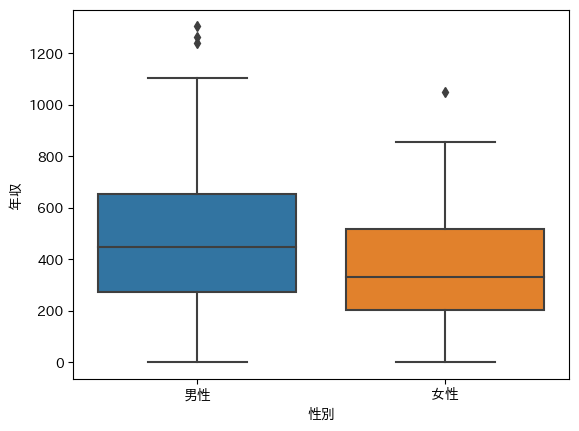

In [ ]:
#sns.catplotで箱ひげ図を描く
sns.boxplot(x='性別', y='年収', data=df)
plt.show()


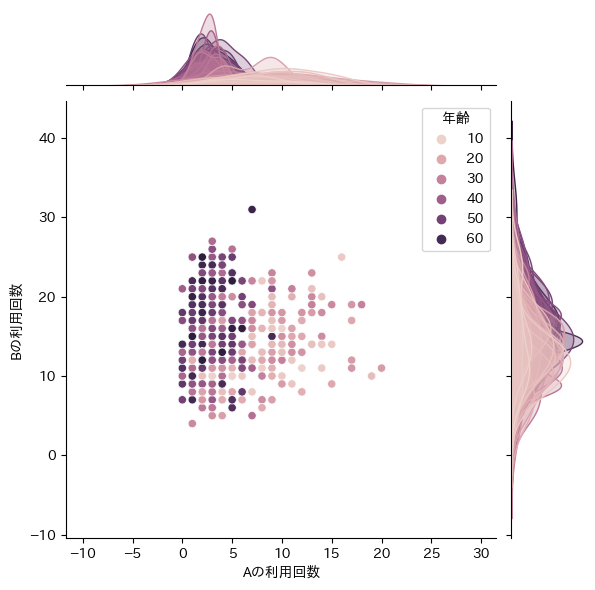

In [ ]:
sns.jointplot(x='Aの利用回数', y='Bの利用回数', data=df, hue='年齢')
plt.show()

# 散布図の表示

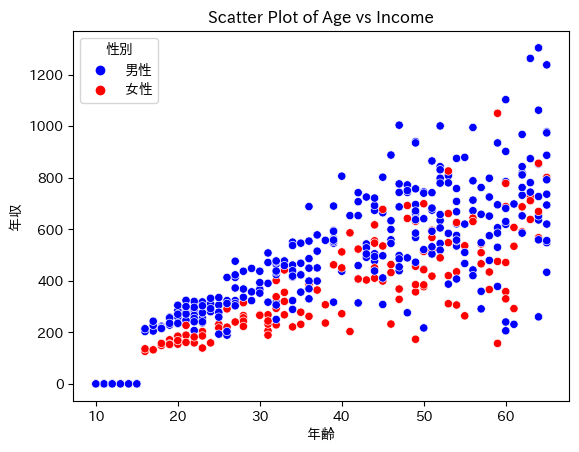

In [ ]:
# Plot scatter plot for Age vs Income using seaborn
sns.scatterplot(data=df, x='年齢', y='年収', hue='性別', palette={'男性': 'blue', '女性': 'red'})
plt.title('Scatter Plot of Age vs Income')
plt.show()

# 散布図行列表示

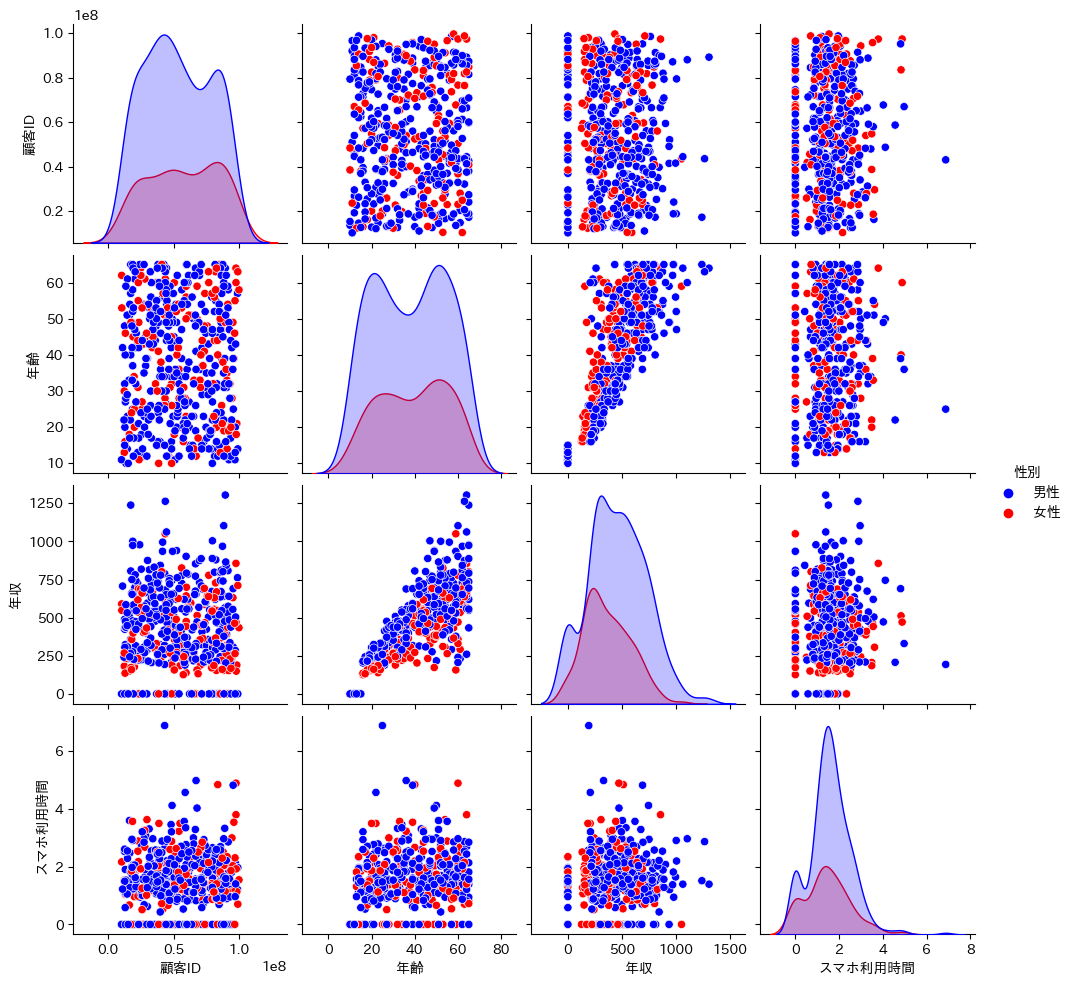

In [ ]:

# Let's bring in the scripting interface
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
# sns.set(font='IPAexGothic')

sns.pairplot( df.iloc[:,0:7], hue='性別', palette={'男性': 'blue', '女性': 'red'})
plt.show()

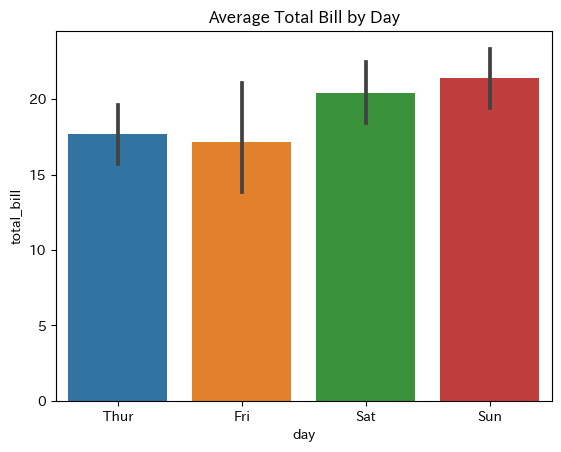

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
sns.barplot(x="day", y="total_bill", data=tips)
plt.title("Average Total Bill by Day")
plt.show()


In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
